# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
names = df[['country']].copy()
X = df.drop(['country'],axis=1)

In [5]:
scaler = StandardScaler().fit(X)

In [6]:
X_scaled = scaler.transform(X)


# 1.) Fit a kmeans Model with any Number of Clusters

In [7]:
kmeans = KMeans(n_clusters = 5)

In [8]:
kmeans.fit(X_scaled)

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [9]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

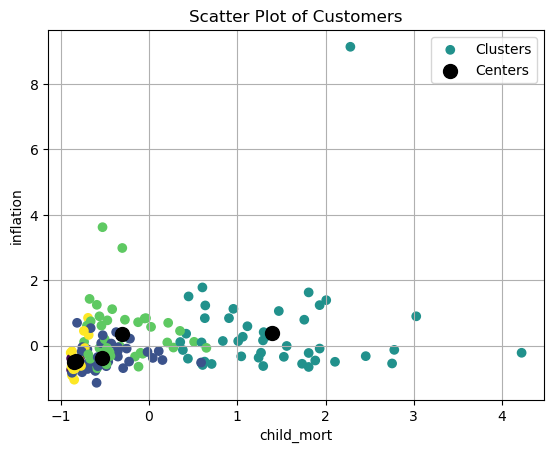

In [10]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 5


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [11]:
WCSSs = []
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random')
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [12]:
# #Bonus
#WCSSs = KMeans(n_clusters = k, n_init = 30, init = 'random').fit(X_scaled).inertia_ for k in range(1,15)
WCSSsBon = [KMeans(n_clusters=k, n_init=30, init='random').fit(X_scaled).inertia_ for k in range(1, 15)]


C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [13]:
WCSSs

[1503.0000000000002,
 1050.2145582853304,
 831.4244352086874,
 700.3229986404374,
 620.2564324973125,
 550.8929602600836,
 508.9232914713079,
 465.2830354742189,
 439.3985287473515,
 396.5115265685499,
 371.3769949060875,
 354.5215583675738,
 339.74611083274453,
 331.79482230616236]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Text(0, 0.5, 'Intertia of clusters')

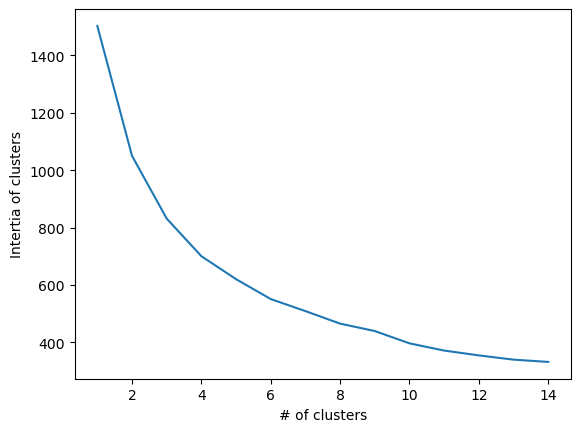

In [14]:
plt.plot(ks,WCSSs)
plt.xlabel('# of clusters')
plt.ylabel('Intertia of clusters')

# 6.) Do the same for a silhoutte plot

In [15]:
from sklearn.metrics import silhouette_score

In [16]:
#silhouette_score?

In [17]:
SCs = []
ks = range(2,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = 'random')
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled,kmeans.labels_))


C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [18]:
SCs

[0.28735668921406704,
 0.28329575683463126,
 0.301375962376881,
 0.2991950897236684,
 0.2702612511127601,
 0.2451291229014243,
 0.24461313105011234,
 0.2240824375101587,
 0.2221100534390162,
 0.20413145855761755,
 0.20925135500986328,
 0.18585822325406634,
 0.18171947595446045]

Text(0, 0.5, 'Intertia of clusters')

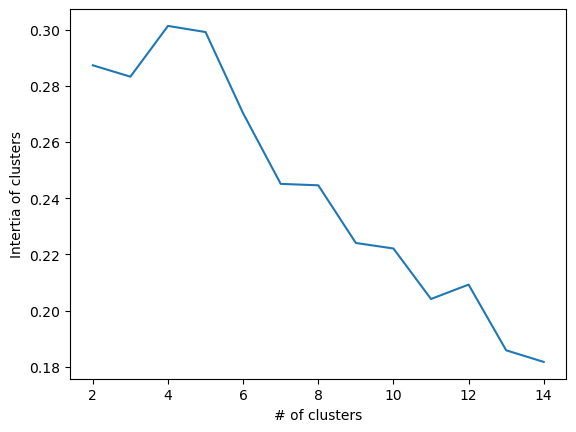

In [19]:
plt.plot(ks,SCs)
plt.xlabel('# of clusters')
plt.ylabel('Intertia of clusters')

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [20]:
#since we are comparing developing and developed countries, looking at it from a binary perspective

In [21]:
kmeans2 = KMeans(n_clusters = 2, n_init = 30, init = 'random').fit(X_scaled)

C:\Users\alexa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
kmeans2.predict(X_scaled)

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [23]:
preds = pd.DataFrame(kmeans2.predict(X_scaled))

In [24]:
output = pd.concat([preds,df],axis=1)

In [25]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [26]:
print('cluster 1 : ')
list(output.loc[output[0]==0, 'country'])

cluster 1 : 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [27]:
print('cluster 2 : ')
list(output.loc[output[0]==1, 'country'])

cluster 2 : 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [28]:
#### Write an observation

Countries that are categorized as 0 are considered to be less developed than countries with a 1. Some of the results for the 1 are surprising whereas most countries that are categroized as 0 are somewhat expected or unsurprising.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [29]:
#kmeans2...

In [30]:
output.groupby(0).mean()

C:\Users\alexa\AppData\Local\Temp\ipykernel_12528\2649171287.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [31]:
output.groupby(0).std()

C:\Users\alexa\AppData\Local\Temp\ipykernel_12528\2077230043.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

In [48]:
output2 = output.copy()

output2.rename(columns={output.columns[0]: 'group'}, inplace=True)


for cols in columns_except_zero:
    # Now, we group by the 'group' column and describe each group
    grouped_description = output2[[cols,'group']].groupby('group').describe()

    print(grouped_description)
    print('\n')

      country                         
        count unique          top freq
group                                 
0          68     68  Afghanistan    1
1          99     99      Albania    1


      child_mort                                                        
           count       mean        std   min   25%   50%      75%    max
group                                                                   
0           68.0  76.280882  38.076068  17.4  48.8  65.6  100.025  208.0
1           99.0  12.161616   8.523122   2.6   4.7  10.3   17.300   42.7


      exports                                                            
        count       mean        std     min     25%    50%     75%    max
group                                                                    
0        68.0  30.198515  18.201742   0.109  17.025  24.95  40.425   85.8
1        99.0  48.603030  30.116032  10.700  28.800  40.10  63.150  200.0


      health                                                    

From the statistics above there is not much too unexpected except for some of the cutoff points of what you would expect a 'developed' country to be at. For instance the mean income between the two groups looks about correct, but while its expected for child mortality to be different the standard deviation and the mean is shocking for those in the devloping world or that are classified as developing.